# Assignment – High Frequency Words

Please answer the following questions in an IPython Notebook, posted to GitHub.
1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [1]:
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import stopwords
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#nltk.download() # Use d and punkt to install

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
print(nltk.__file__)

/Users/rajans/.local/lib/python3.6/site-packages/nltk/__init__.py


In [4]:
# Loading War & Peace by Leo Tolstoy
import urllib
url = "https://archive.org/stream/warandpeace030164mbp/warandpeace030164mbp_djvu.txt"
response = urllib.request.urlopen(url)
raw = response.read().decode('utf8')

In [5]:
len(raw)

3423113

In [6]:
raw[:200]

'<!DOCTYPE html>\n<html lang="en">\n<!-- __ _ _ _ __| |_ (_)__ _____\n    / _` | \'_/ _| \' \\| |\\ V / -_)\n    \\__,_|_| \\__|_||_|_| \\_/\\___| -->\n  <head>\n    <title>Full text of &quot;War And Peace&quot;</ti'

The variable raw contains a string with 3423113 characters. This is the raw content of the book, including many details we are not interested in such as whitespace, line breaks and blank lines. Notice the \r and \n in the opening line of the file, which is how Python displays the special carriage return and line feed characters. For our language processing, we want to break up the string into words and punctuation. This step is called tokenization, and it produces our familiar structure, a list of words and punctuation.

Limiting to Just the Text
War & Peace contain extra data in the header and footer of the text. We need to limit the corpus to just the text of the book and do so with the code below. This must be done by hand since each book has a slightly different header and footer text.

In [7]:
text_start = raw.find("CONTEXTS ")
text_end = raw.find("and to recognize a dependence of which we are not conscious. ")
raw = raw[text_start:text_end]

In [8]:
raw[0:80]

'CONTEXTS \n\n\n\nBIOGRAPHICAL NOTE v \n\nThe Principal Characters in War and Peace \n\nA'

In [9]:
tokens = word_tokenize(raw)
words = [w for w in tokens if w.isalpha()]
words = [w.lower() for w in words]

In [11]:
len(tokens)

690509

# Total Unique Words
We have elected to count the total number of unique words in three different ways. The first is just count the number of unique words in all of their variants. Secondly we used the Porter Stemmer to reduce all words to their stems. This will compress a number of words to the same value. Finally we used the WordNet Lemmatizer to reduce the words in the text to their root lemma. This also compressed the text to a smaller set.

# Using all Variations of a Word
We find that using all variations of a word gives us 20730 unique words in the text.

In [12]:
len(set(words))

20730

# Using the Porter Stemmer
Reducing each of the words to its stem gives us a set of words that total 13606 unique words.

In [13]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [14]:
stem = [ps.stem(w) for w in words]
stem = set(stem)
len(stem)

13606

# Using the WordNet Lemmatizer
Finnaly reducing each of the words to its underlying lemma produces a unique word list of 18644 words.

In [15]:
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()

In [16]:
lemma = [wordnet.lemmatize(w) for w in words]
lemma = set(lemma)
len(lemma)

18644

# Half the Unique Words
For this problem we interpreted the problem to try an find out howmany different words are used to cover half of the total words in the text. This gives us an idea of how much vocabulary is used to fill half of the text. We found that 172 unique words make up a liitle more than 50% of the words in the text. Expect to read a lot of "the", "and", and "I" in this novel.

In [17]:
fd = nltk.FreqDist(words)
top_words = fd.most_common(200)

In [18]:
i = 0
half_words = []
for w in top_words:
    if i >= len(tokens)/2:
        break
    else:
        i = i + w[1]
        half_words.append(w)

len(half_words)

172

In [19]:
half_wordsdf = pd.DataFrame(half_words, columns = ['Words','Count'])
half_wordsdf.head(10)

,Words,Count
0,the,34736
1,and,22607
2,to,16786
3,of,14989
4,a,10601
5,he,10009
6,in,8969
7,that,8175
8,his,8019
9,was,7368


# Top 200 Words
We next use the built in frequency distribution function in NLTK to count the frequency of each word in the text. We then built a plot of these 200 words. We also decided to remove the most common start words and plot a graph of these words as well.

In [29]:
top_words = fd.most_common(200)
top_wordsdf = pd.DataFrame(top_words, columns = ['Word', 'Count'])
top_wordsdf.head(25)

,Word,Count
0,the,34736
1,and,22607
2,to,16786
3,of,14989
4,a,10601
5,he,10009
6,in,8969
7,that,8175
8,his,8019
9,was,7368


In [28]:
top_wordsdf.tail(25)

,Word,Count
175,smile,412
176,knew,411
177,told,409
178,let,407
179,whom,403
180,house,400
181,book,398
182,while,398
183,took,398
184,turned,397


# Plot of the 100 Most Common Words

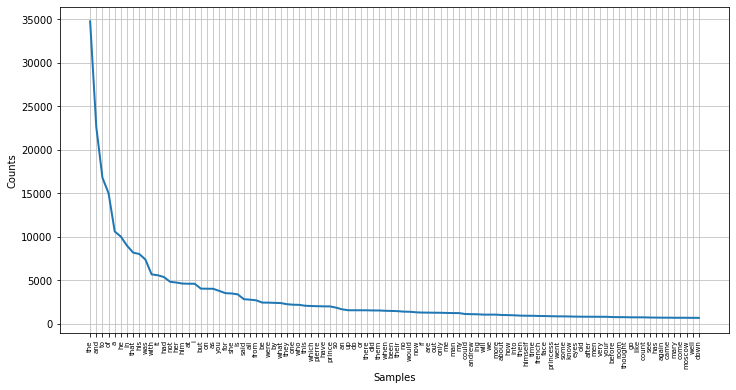

In [27]:
plt.figure(figsize=(12, 6))
plt.rc('xtick', labelsize=7) 
# plot the top 20 tokens
fd.plot(100)

# Plot of the Top Words with Common Words Removed

In [23]:
stoplist = stopwords.words('english')
uwords = [w for w in words if w not in stoplist]
ufd = nltk.FreqDist(uwords)

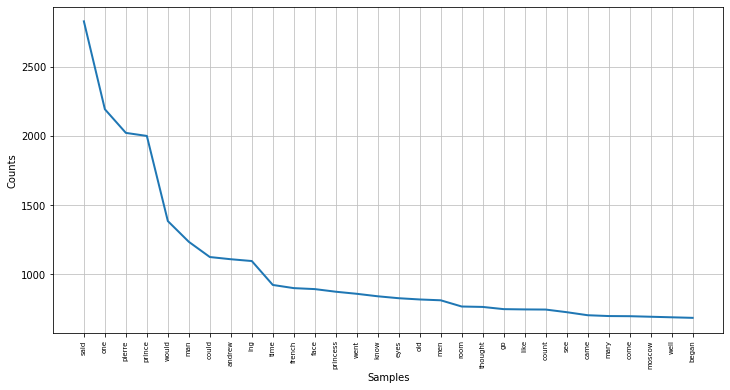

In [24]:
plt.figure(figsize=(12, 6))
ufd.plot(30)

# Testing Zipf's Law

Finally we test the performance of our text in accordance to Zipf's Law by plotting the frequency of the top 500 words on a log scale. We would expect that this forms a straight line but as we discuss below this was not the case.

In [25]:
zwords = top_words = fd.most_common(500)
x_vec = [i+1 for i in range(len(zwords))]
y_vec = [freq for (word,freq) in zwords]

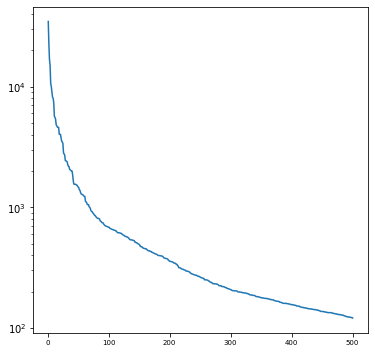

In [26]:
plt.figure(1, figsize=(6,6))
plt.semilogy(x_vec, y_vec)
plt.show()

According to Zipf's Law we expect if the most common word occurs n times then the next most common word should occur $\frac{n}{2}$ times and so on. On a log scale graph this would be a straight line. We can see from our text, War & Peace that this is not the case. It appears that the most commonly used words occur at a much higher frequency then the next and so on for the first 100 words or so. This gives us the curved graph that we see above.
Compared to all texts I think that this corpus uses the same “common” words as we would find across all corpus in the English language. However given our graph from testing Zipf’s Law we see that Leo Tolstoy uses the word “the” more often then we would expect and then uses the rest of his common vocabulary in a similar amounts. We would expect to see a reduction more similar to a straight line on the log scale.